In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

# 決定木　回帰ver

In [9]:
df = sns.load_dataset('tips')
df = pd.get_dummies(data=df, drop_first=True)
y_col = 'tip'
X = df.drop(columns=[y_col])
y = df[y_col]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# モデルの構築
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


1.1060246260428703

In [17]:
model.score(X_test, y_test)  #R-squaredの値が返ってくる

0.3590618660303134

# モデルの可視化

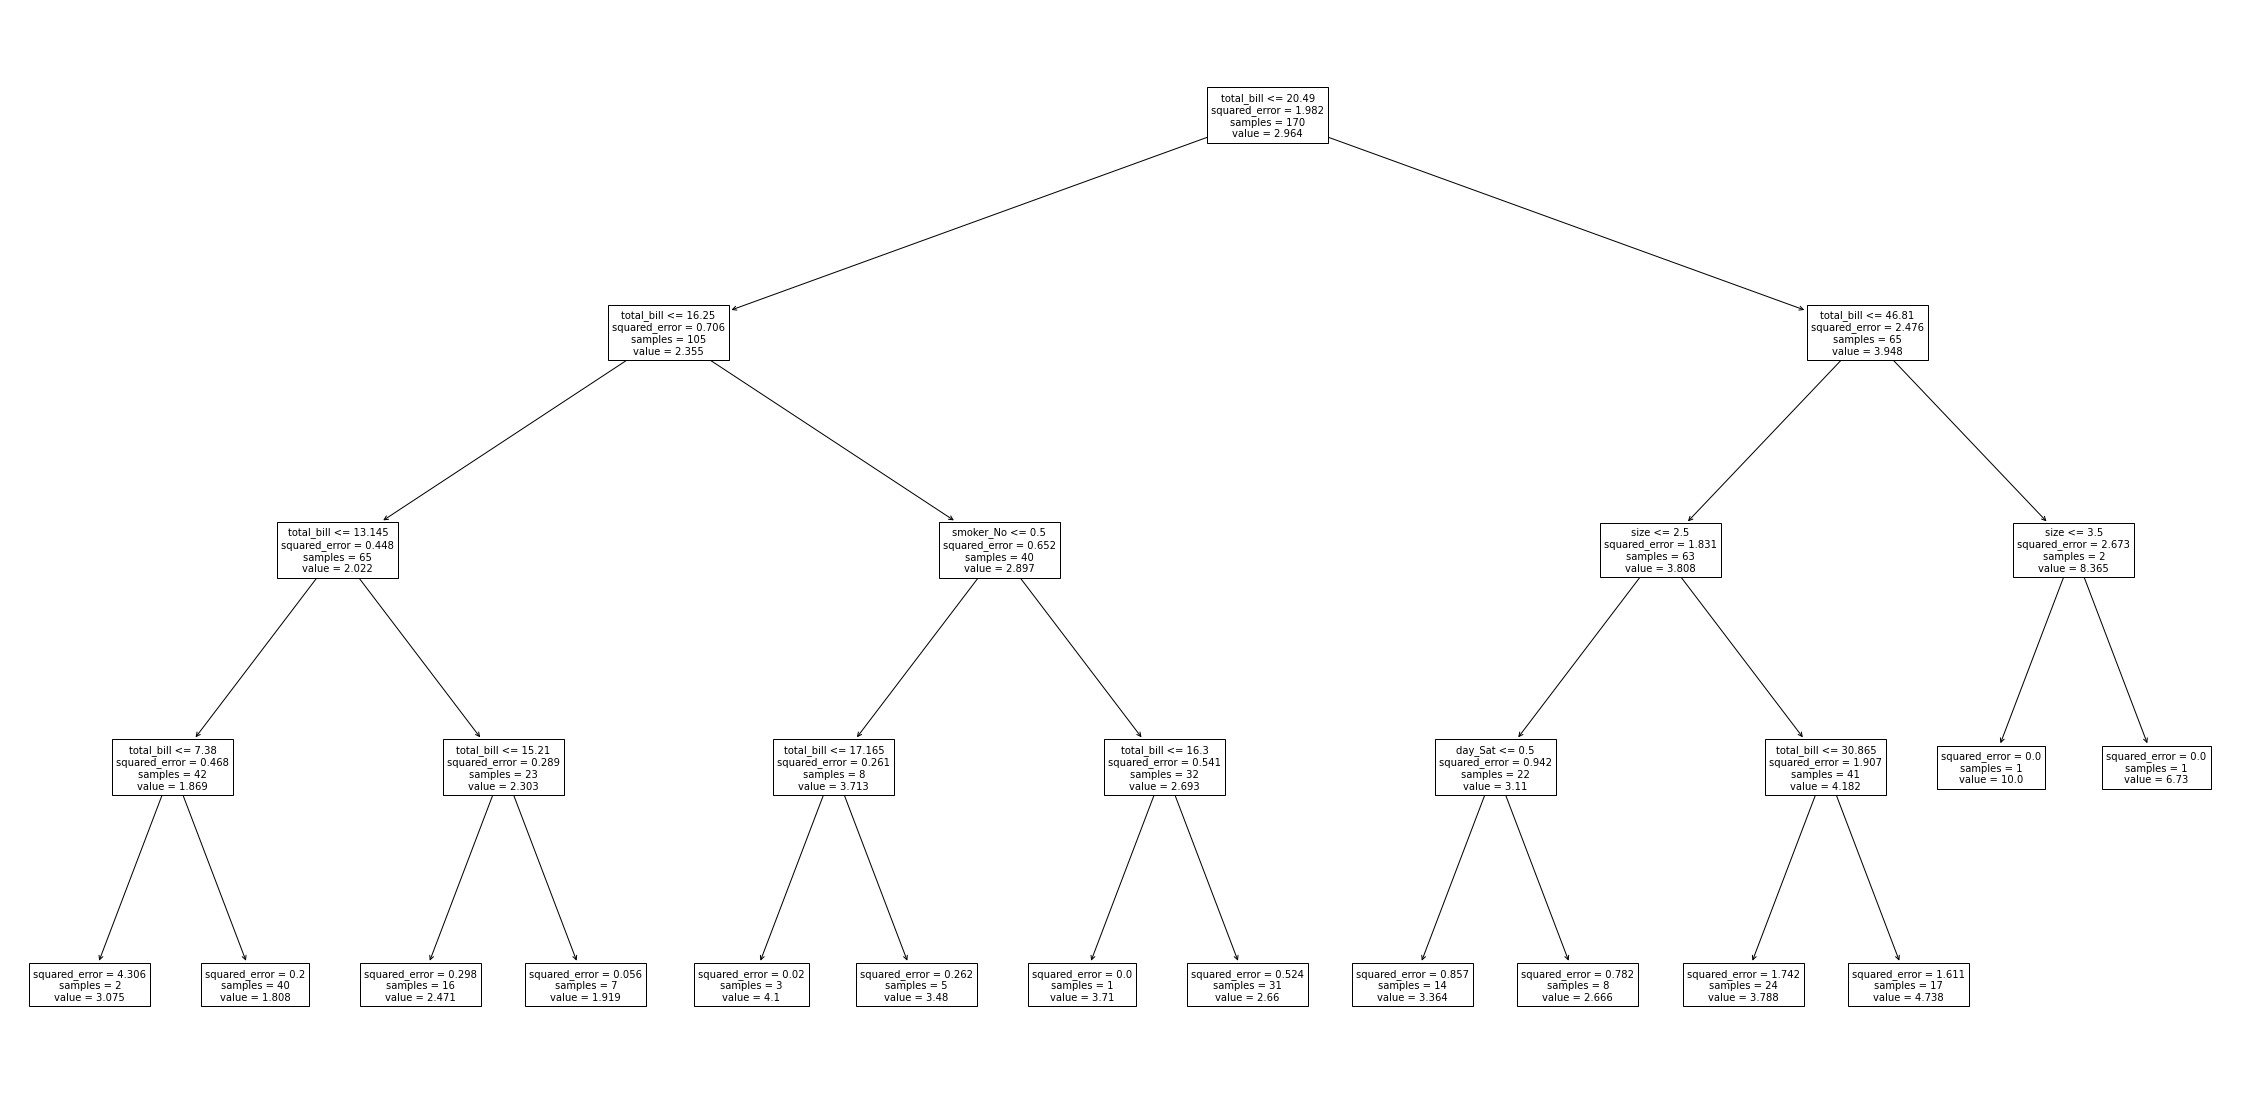

In [22]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(model, fontsize=10, feature_names=model.feature_names_in_)

In [29]:
X_train[X_train['total_bill']>20.49]

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
52,34.81,4,1,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
56,38.01,4,0,0,0,1,0,1
179,34.63,2,0,0,0,0,1,1
214,28.17,3,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
216,28.15,5,0,0,0,1,0,1
211,25.89,4,0,0,0,1,0,1
103,22.42,2,1,0,0,1,0,1
192,28.44,2,0,0,0,0,0,0


In [26]:
print(tree.export_text(model, feature_names=list(model.feature_names_in_)))

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

# Challenge 決定技の特徴量の重要度を描画

<BarContainer object of 8 artists>

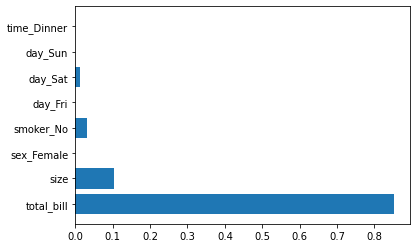

In [44]:
plt.barh(model.feature_names_in_, width=model.feature_importances_)

In [37]:
model.feature_names_in_

array(['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'], dtype=object)

# Minimal Cost Complexity Pruning

In [45]:
model = tree.DecisionTreeRegressor(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)

In [46]:
eff_alphas = path.ccp_alphas

In [48]:
models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=eff_alpha)
    model.fit(X_train, y_train)
    models.append(model)

In [59]:
from sklearn.metrics import mean_squared_error
train_scores = [mean_squared_error(y_train, model.predict(X_train)) for model in models]
test_scores = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

Text(0, 0.5, 'MSE')

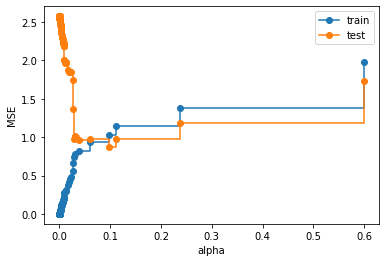

In [66]:
plt.plot(eff_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
plt.plot(eff_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')